<a href="https://colab.research.google.com/github/Lagc93/Procesamiento-Digital-De-Senales/blob/main/TAREA_3_PROCESAMIENTO_DIGITAL_DE_SE%C3%91ALES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### TAREA 3 PROCESAMIENTO DIGITAL DE SEÑALES

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from scipy.signal import convolve
from scipy.signal import correlate


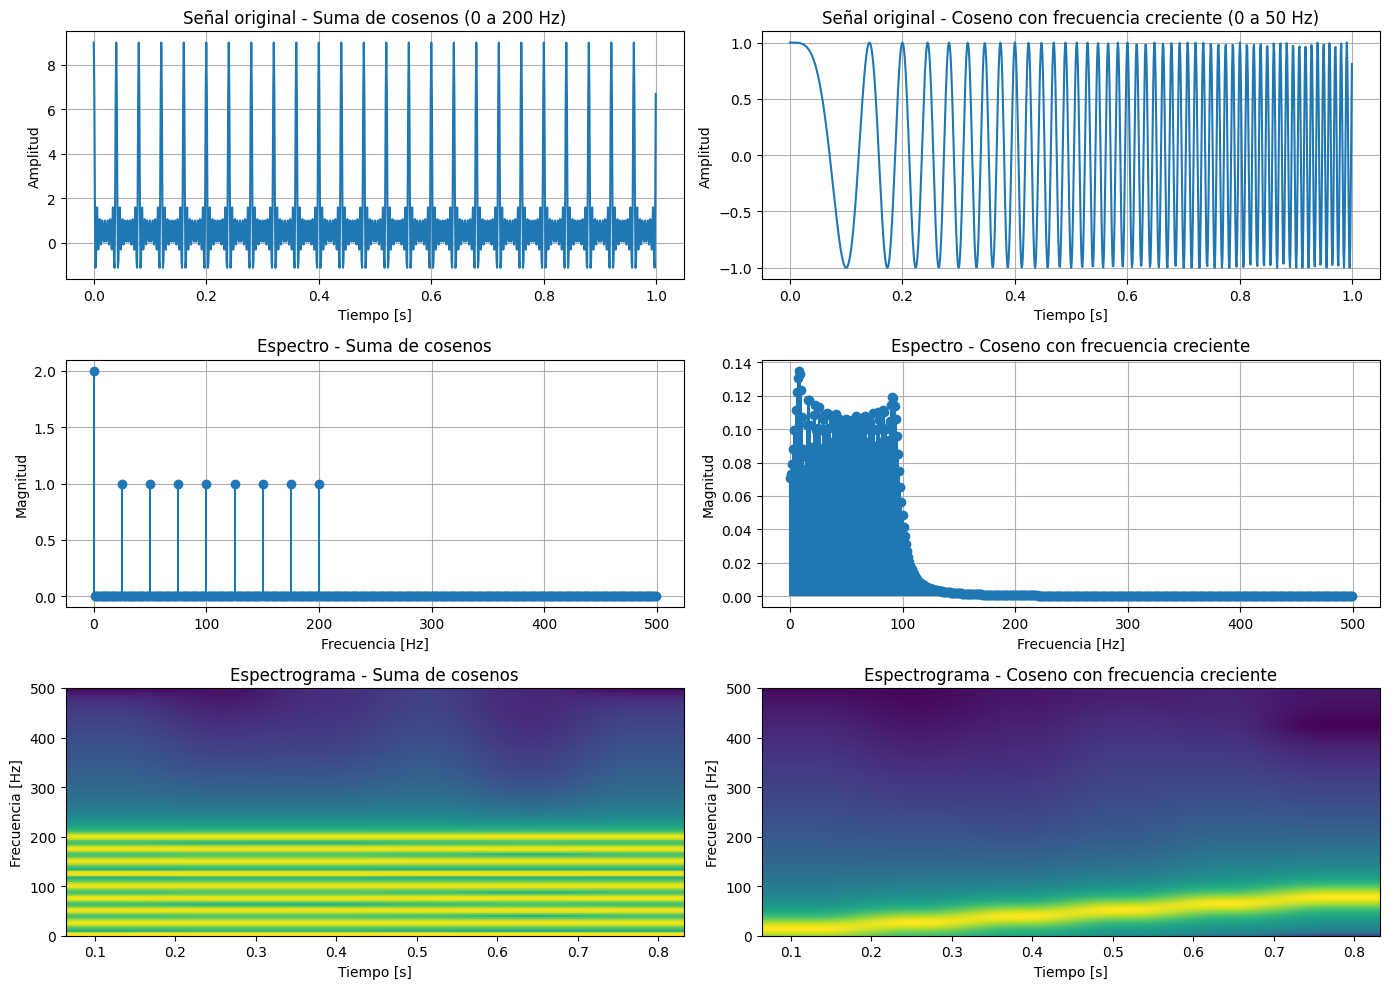

In [11]:

# Parámetros
fs = 1000  # Frecuencia de muestreo (Hz)
T = 1      # Duración de la señal (s)
t = np.linspace(0, T, int(fs*T), endpoint=False)

# Parte 1: Suma de cosenos de varias frecuencias
frecuencias = [0, 25, 50, 75, 100, 125, 150, 175, 200]
suma_cos = sum(np.cos(2 * np.pi * f * t) for f in frecuencias)

# FFT de la suma de cosenos
N = len(t)
fft_suma = fft(suma_cos)
freqs = fftfreq(N, 1/fs)

# Parte 2: Chirp (frecuencia de 1 a 50 Hz)
f0 = 0     # Frecuencia inicial
f1 = 100    # Frecuencia final
chirp_cos = np.cos(2 * np.pi * (f0 * t + ((f1 - f0) / (2 * T)) * t**2))

# FFT del chirp
fft_chirp = fft(chirp_cos)

# Unificación del código: señales originales, espectros y espectrogramas
fig, axs = plt.subplots(3, 2, figsize=(14, 10))

# Señal original - Suma de cosenos
axs[0, 0].plot(t, suma_cos)
axs[0, 0].set_title("Señal original - Suma de cosenos (0 a 200 Hz)")
axs[0, 0].set_xlabel("Tiempo [s]")
axs[0, 0].set_ylabel("Amplitud")
axs[0, 0].grid()

# Señal original - Chirp
axs[0, 1].plot(t, chirp_cos)
axs[0, 1].set_title("Señal original - Coseno con frecuencia creciente (0 a 50 Hz)")
axs[0, 1].set_xlabel("Tiempo [s]")
axs[0, 1].set_ylabel("Amplitud")
axs[0, 1].grid()

# Espectro - Suma de cosenos
axs[1, 0].stem(freqs[:N//2], 2.0/N * np.abs(fft_suma[:N//2]), basefmt=" ")
axs[1, 0].set_title("Espectro - Suma de cosenos")
axs[1, 0].set_xlabel("Frecuencia [Hz]")
axs[1, 0].set_ylabel("Magnitud")
axs[1, 0].grid()

# Espectro - Chirp
axs[1, 1].stem(freqs[:N//2], 2.0/N * np.abs(fft_chirp[:N//2]), basefmt=" ")
axs[1, 1].set_title("Espectro - Coseno con frecuencia creciente")
axs[1, 1].set_xlabel("Frecuencia [Hz]")
axs[1, 1].set_ylabel("Magnitud")
axs[1, 1].grid()

# Espectrograma - Suma de cosenos
axs[2, 0].specgram(suma_cos, Fs=fs, NFFT=256, noverlap=128, cmap='viridis')
axs[2, 0].set_title("Espectrograma - Suma de cosenos")
axs[2, 0].set_xlabel("Tiempo [s]")
axs[2, 0].set_ylabel("Frecuencia [Hz]")

# Espectrograma - Chirp
axs[2, 1].specgram(chirp_cos, Fs=fs, NFFT=256, noverlap=128, cmap='viridis')
axs[2, 1].set_title("Espectrograma - Coseno con frecuencia creciente")
axs[2, 1].set_xlabel("Tiempo [s]")
axs[2, 1].set_ylabel("Frecuencia [Hz]")

plt.tight_layout()
plt.show()



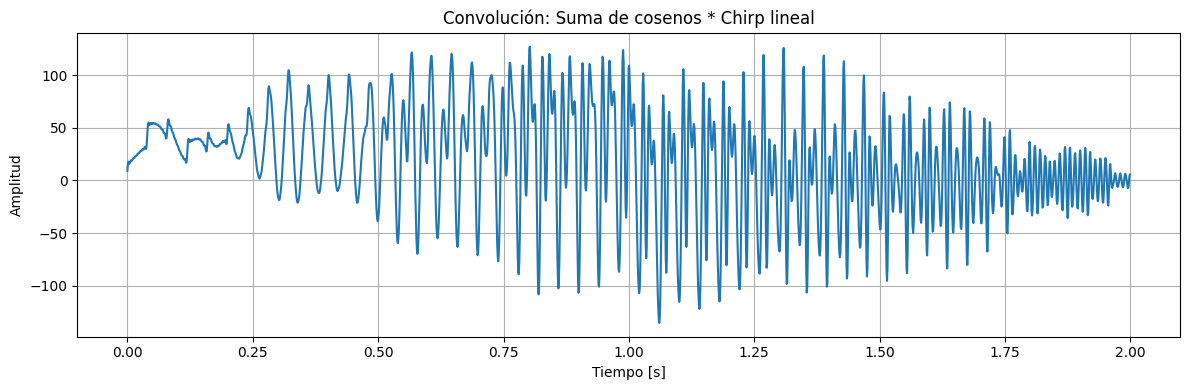

In [13]:
# Realizar la convolución entre la suma de cosenos y el chirp lineal
conv_result = convolve(suma_cos, chirp_cos, mode='full')
t_conv = np.linspace(0, 2*T, len(conv_result), endpoint=False)  # nuevo vector de tiempo

# Graficar el resultado de la convolución
plt.figure(figsize=(12, 4))
plt.plot(t_conv, conv_result)
plt.title("Convolución: Suma de cosenos * Chirp lineal")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.grid()
plt.tight_layout()
plt.show()

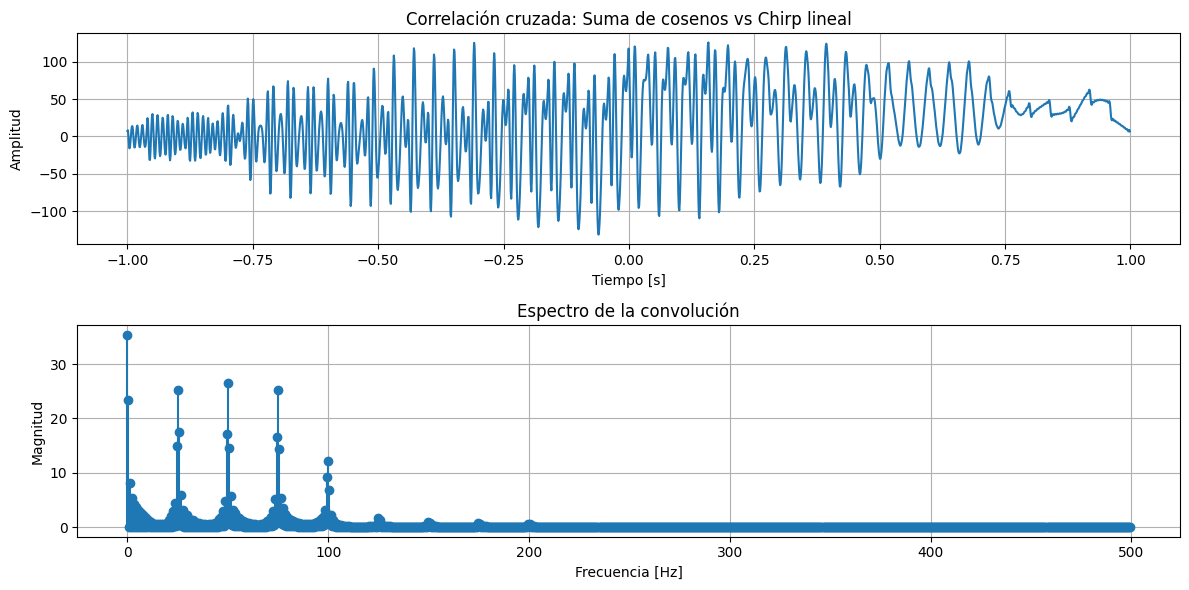

In [14]:
# Calcular la correlación cruzada entre las dos señales
corr_result = correlate(suma_cos, chirp_cos, mode='full')
t_corr = np.linspace(-T, T, len(corr_result), endpoint=False)

# Espectro de la convolución
fft_conv = fft(conv_result)
freqs_conv = fftfreq(len(conv_result), 1/fs)

# Graficar la correlación cruzada
fig, axs = plt.subplots(2, 1, figsize=(12, 6))

axs[0].plot(t_corr, corr_result)
axs[0].set_title("Correlación cruzada: Suma de cosenos vs Chirp lineal")
axs[0].set_xlabel("Tiempo [s]")
axs[0].set_ylabel("Amplitud")
axs[0].grid()

# Graficar el espectro de la convolución
axs[1].stem(freqs_conv[:len(conv_result)//2], 2.0/len(conv_result) * np.abs(fft_conv[:len(conv_result)//2]), basefmt=" ")
axs[1].set_title("Espectro de la convolución")
axs[1].set_xlabel("Frecuencia [Hz]")
axs[1].set_ylabel("Magnitud")
axs[1].grid()

plt.tight_layout()
plt.show()
